In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Demo data - Sheet1.csv")
df.head()

,Income (in 1000 dollars),Total Assests Value (in 100 dollars),Deafult or Not
0,5,300,Defaulter
1,10,150,Defaulter
2,10,350,Defaulter
3,10,420,Defaulter
4,15,220,Defaulter


In [4]:
deafault = df[df["Deafult or Not"] == "Defaulter"]
non_default = df[df["Deafult or Not"] == "Non Default"]

In [5]:
deafault

,Income (in 1000 dollars),Total Assests Value (in 100 dollars),Deafult or Not
0,5,300,Defaulter
1,10,150,Defaulter
2,10,350,Defaulter
3,10,420,Defaulter
4,15,220,Defaulter
5,17,430,Defaulter


In [6]:
non_default

,Income (in 1000 dollars),Total Assests Value (in 100 dollars),Deafult or Not
6,30,600,Non Default
7,30,710,Non Default
8,35,310,Non Default
9,35,450,Non Default
10,37,520,Non Default
11,40,630,Non Default
12,42,305,Non Default
13,44,400,Non Default


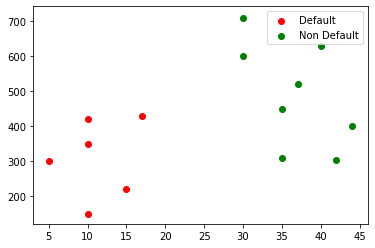

In [7]:
plt.scatter(deafault["Income (in 1000 dollars)"],deafault["Total Assests Value (in 100 dollars)"],label = "Default", color = "red")
plt.scatter(non_default["Income (in 1000 dollars)"],non_default["Total Assests Value (in 100 dollars)"],label = "Non Default", color = "green")
plt.legend(loc = "best")
plt.show()

In [10]:
label_mapper = {"Defaulter":0, "Non Default":1}
df["label"] = df["Deafult or Not"].map(label_mapper)
df

,Income (in 1000 dollars),Total Assests Value (in 100 dollars),Deafult or Not,label
0,5,300,Defaulter,0
1,10,150,Defaulter,0
2,10,350,Defaulter,0
3,10,420,Defaulter,0
4,15,220,Defaulter,0
5,17,430,Defaulter,0
6,30,600,Non Default,1
7,30,710,Non Default,1
8,35,310,Non Default,1
9,35,450,Non Default,1


In [11]:
import numpy as np

In [12]:
def get_predictions(weights, features):
    net_input = np.dot(weights[1:], features) + weights[0]
    if net_input < 0:
        return 0
    else:
        return 1

In [13]:
df.shape

(14, 4)

In [19]:
df.iloc[0][:2].values

array([5, 300], dtype=object)

In [21]:
n_iter = 10
learning_rate = 0.01
weights = np.random.normal(0.0,1,3)

for iter in range(n_iter):
    for data in range(df.shape[0]):
        current_row = df.iloc[data,:]
        features = current_row[:2].values
        prediction = get_predictions(weights, features)
        actual = current_row["label"]
        weights[0] += (actual - prediction) * learning_rate * 1
        weights[1] += (actual - prediction) * learning_rate * features[0]
        weights[2] += (actual - prediction) * learning_rate * features[1]

In [22]:
weights

array([0.88279461, 0.8676217 , 5.58643023])

In [23]:
get_predictions(weights, [30,400])

1

In [24]:
from sklearn.linear_model import Perceptron

In [25]:
percep = Perceptron()
percep.fit(df.iloc[:,:2], df["label"])

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
percep.predict(np.array([30,400]).reshape((1,-1)))

array([1])